<a href="https://colab.research.google.com/github/Bhanuagg1183/Cardio-Divination/blob/main/Cardio_Divination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("Heart Disease dataset.csv")
print(df.head())
print(df.info())

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

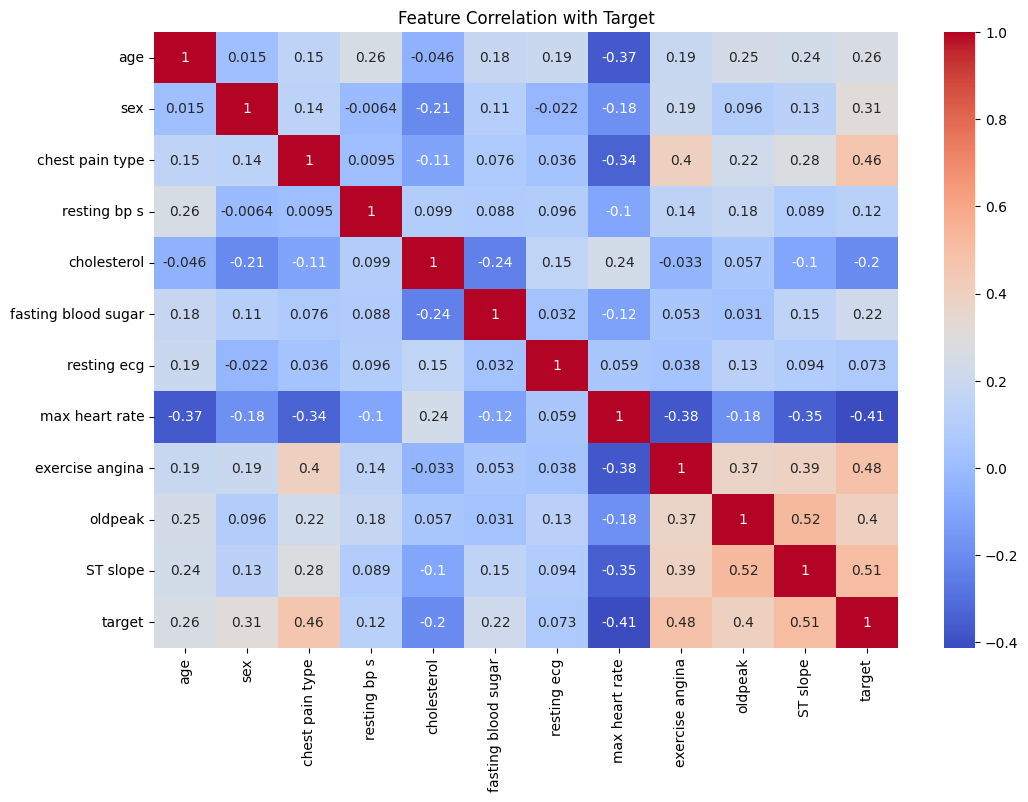

In [ ]:
print(df.describe())
print(df['target'].value_counts())  # 0 = No Heart Disease, 1 = Heart Disease

# Visualize correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Try 'linear', 'rbf', etc.
svm_model.fit(X_train, y_train)

SVC()

Accuracy: 0.8907563025210085

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       107
           1       0.87      0.95      0.91       131

    accuracy                           0.89       238
   macro avg       0.90      0.88      0.89       238
weighted avg       0.89      0.89      0.89       238



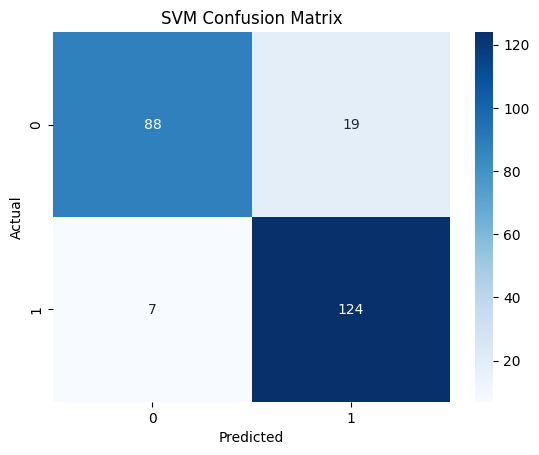

In [ ]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Kernel: {kernel}, Accuracy: {accuracy_score(y_test, preds)}")

Kernel: linear, Accuracy: 0.8445378151260504
Kernel: poly, Accuracy: 0.8697478991596639
Kernel: rbf, Accuracy: 0.8907563025210085
Kernel: sigmoid, Accuracy: 0.7857142857142857


In [ ]:
# Sample patient input
new_patient = pd.DataFrame([{
    'age': 37,
    'sex': 1,
    'chest pain type': 2,
    'resting bp s': 130,
    'cholesterol': 283,
    'fasting blood sugar': 0,
    'resting ecg': 1,
    'max heart rate': 98,
    'exercise angina': 0,
    'oldpeak': 0,
    'ST slope': 1,
   }])

new_patient_scaled = scaler.transform(new_patient)
prediction = svm_model.predict(new_patient_scaled)
print("Prediction (1=Heart Disease, 0=No Heart Disease):", prediction[0])


NameError: name 'pd' is not defined